In [3]:
mrm2_treat = df[df['treatment'] == 1]['mrm2'].dropna()
mrm2_ctrl = df[df['treatment'] == 0]['mrm2'].dropna()

In [4]:
mean_diff = mrm2_treat.mean() - mrm2_ctrl.mean()
mean_diff

0.013685851546783923

In [5]:
se_diff = np.sqrt(mrm2_treat.var(ddof=1)/len(mrm2_treat) + mrm2_ctrl.var(ddof=1)/len(mrm2_ctrl))
t_stat = mean_diff / se_diff
df_degrees = min(len(mrm2_treat), len(mrm2_ctrl)) - 1
p_val = 2 * (1 - stats.t.cdf(abs(t_stat), df_degrees))

Balance Test (t-test & OLS for mrm2)

In [6]:
print(f"T-test: t={t_stat:.4f}, p={p_val:.4f}")
print(smf.ols('mrm2 ~ treatment', data=df).fit().summary())

T-test: t=0.1195, p=0.9049
                            OLS Regression Results                            
Dep. Variable:                   mrm2   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01428
Date:                Sat, 19 Apr 2025   Prob (F-statistic):              0.905
Time:                        16:53:57   Log-Likelihood:            -1.9585e+05
No. Observations:               50082   AIC:                         3.917e+05
Df Residuals:                   50080   BIC:                         3.917e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.9981    

Barplot of donation rate

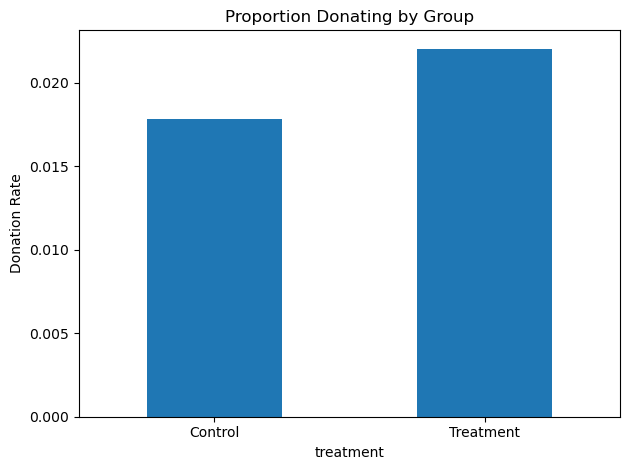

In [7]:
df.groupby('treatment')['gave'].mean().plot(kind='bar')
plt.title('Proportion Donating by Group')
plt.ylabel('Donation Rate')
plt.xticks(ticks=[0,1], labels=['Control', 'Treatment'], rotation=0)
plt.tight_layout()
plt.show()

T-test and OLS for donation rate

In [8]:
print(stats.ttest_ind(df[df['treatment']==1]['gave'], df[df['treatment']==0]['gave']))
print(smf.ols('gave ~ treatment', data=df).fit().summary())

TtestResult(statistic=3.101361000543946, pvalue=0.0019274025949016982, df=50081.0)
                            OLS Regression Results                            
Dep. Variable:                   gave   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.618
Date:                Sat, 19 Apr 2025   Prob (F-statistic):            0.00193
Time:                        16:57:10   Log-Likelihood:                 26630.
No. Observations:               50083   AIC:                        -5.326e+04
Df Residuals:                   50081   BIC:                        -5.324e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

Probit Regression

In [11]:
print(smf.probit('gave ~ treatment', data=df).fit().summary())

Optimization terminated successfully.
         Current function value: 0.100443
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:                   gave   No. Observations:                50083
Model:                         Probit   Df Residuals:                    50081
Method:                           MLE   Df Model:                            1
Date:                Sat, 19 Apr 2025   Pseudo R-squ.:               0.0009783
Time:                        16:57:42   Log-Likelihood:                -5030.5
converged:                       True   LL-Null:                       -5035.4
Covariance Type:            nonrobust   LLR p-value:                  0.001696
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1001      0.023    -90.073      0.000      -2.146      -2.054
treatment      0.0868      0.

T-tests for match ratio

In [12]:
g1 = df[df['ratio'] == '1']['gave']
g2 = df[df['ratio'] == '2']['gave']
g3 = df[df['ratio'] == '3']['gave']
print(stats.ttest_ind(g2, g1))
print(stats.ttest_ind(g3, g2))

TtestResult(statistic=nan, pvalue=nan, df=nan)
TtestResult(statistic=nan, pvalue=nan, df=nan)


OLS regression for ratios

In [13]:
print(smf.ols('gave ~ C(ratio)', data=df[df['treatment']==1]).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   gave   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4263
Date:                Sat, 19 Apr 2025   Prob (F-statistic):              0.734
Time:                        16:58:01   Log-Likelihood:                 16688.
No. Observations:               33396   AIC:                        -3.337e+04
Df Residuals:                   33392   BIC:                        -3.333e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       1.23e+09   1.12e+10      0.110

Response rate differences manually

In [14]:
rate_1 = g1.mean()
rate_2 = g2.mean()
rate_3 = g3.mean()
print("2:1 - 1:1:", rate_2 - rate_1)
print("3:1 - 2:1:", rate_3 - rate_2)

2:1 - 1:1: nan
3:1 - 2:1: nan


Donation amount ~ treatment (OLS)

In [15]:
print(smf.ols('amount ~ treatment', data=df).fit().summary())
print(smf.ols('amount ~ treatment', data=df[df['gave'] == 1]).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.461
Date:                Sat, 19 Apr 2025   Prob (F-statistic):             0.0628
Time:                        17:14:16   Log-Likelihood:            -1.7946e+05
No. Observations:               50083   AIC:                         3.589e+05
Df Residuals:                   50081   BIC:                         3.589e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8133      0.067     12.063      0.0

Histograms of donation amounts

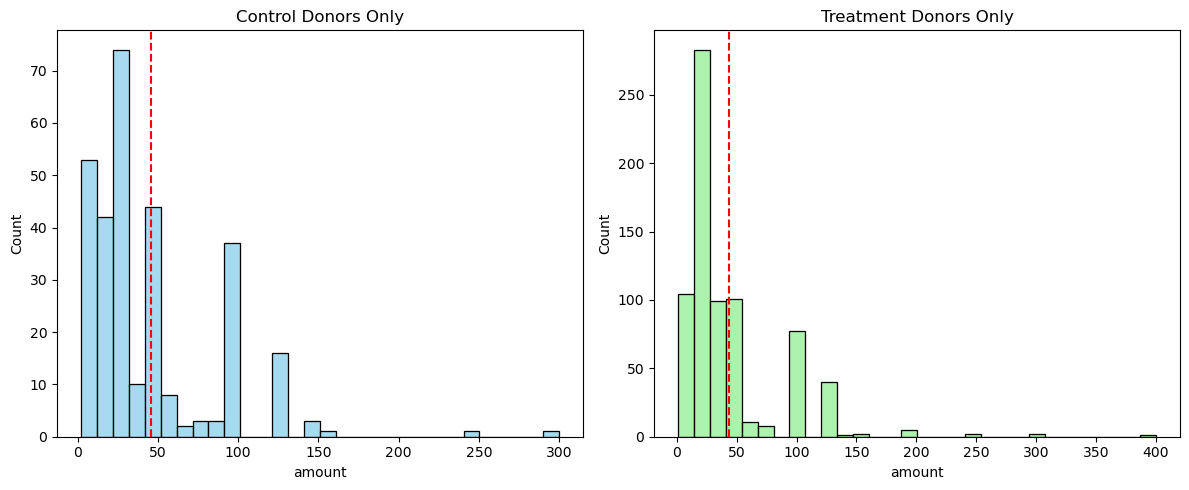

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df[(df['treatment']==0) & (df['gave']==1)]['amount'], ax=ax[0], bins=30, color='skyblue')
ax[0].axvline(df[(df['treatment']==0) & (df['gave']==1)]['amount'].mean(), color='red', linestyle='--')
ax[0].set_title('Control Donors Only')
sns.histplot(df[(df['treatment']==1) & (df['gave']==1)]['amount'], ax=ax[1], bins=30, color='lightgreen')
ax[1].axvline(df[(df['treatment']==1) & (df['gave']==1)]['amount'].mean(), color='red', linestyle='--')
ax[1].set_title('Treatment Donors Only')
plt.tight_layout()
plt.show()

LLN Simulation Plot

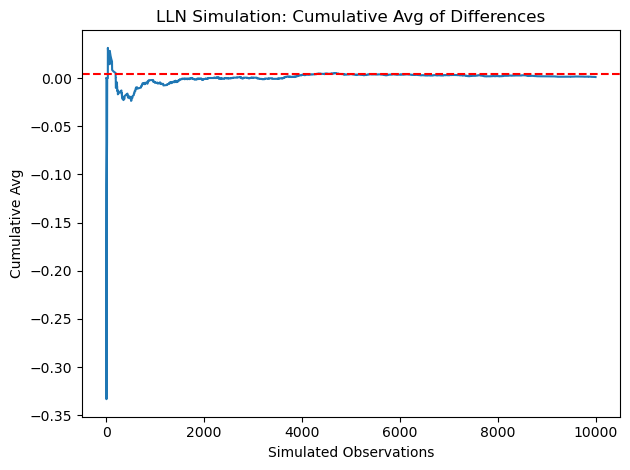

In [17]:
control = np.random.binomial(1, 0.018, 10000)
treatment = np.random.binomial(1, 0.022, 10000)
diffs = treatment - control
cum_avg = np.cumsum(diffs) / np.arange(1, 10001)
plt.plot(cum_avg)
plt.axhline(0.004, color='red', linestyle='--')
plt.title('LLN Simulation: Cumulative Avg of Differences')
plt.xlabel('Simulated Observations')
plt.ylabel('Cumulative Avg')
plt.tight_layout()
plt.show()

CLT Simulation Histograms

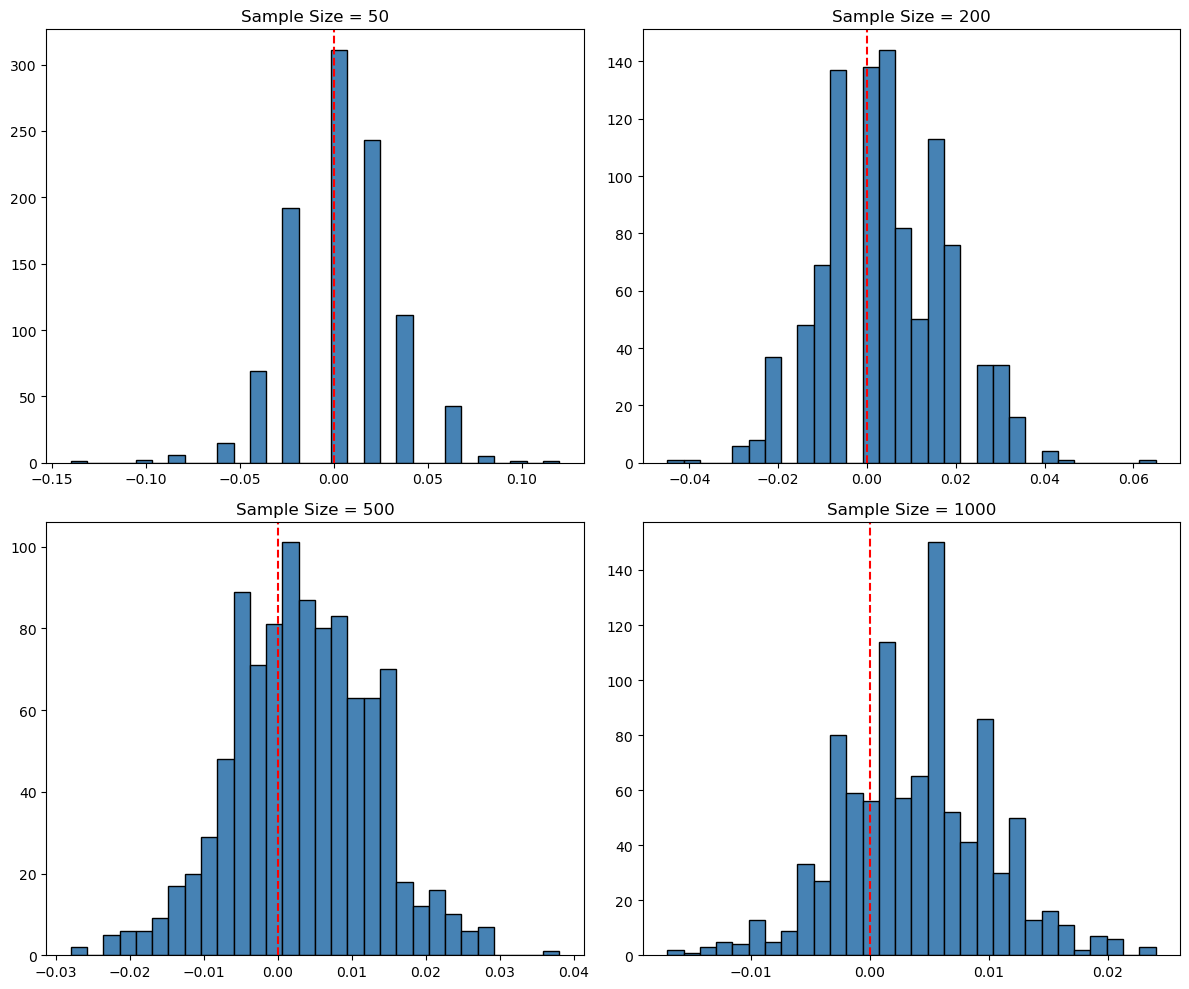

In [18]:
def simulate_diffs(n, reps=1000):
    t = np.random.binomial(1, 0.022, (reps, n))
    c = np.random.binomial(1, 0.018, (reps, n))
    return t.mean(axis=1) - c.mean(axis=1)

sizes = [50, 200, 500, 1000]
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
for i, size in enumerate(sizes):
    diffs = simulate_diffs(size)
    ax = axs[i//2, i%2]
    ax.hist(diffs, bins=30, color='steelblue', edgecolor='black')
    ax.axvline(0, color='red', linestyle='--')
    ax.set_title(f'Sample Size = {size}')
plt.tight_layout()
plt.show()